# 2회차 실습 과제: 확률 기초와 확률분포

## 문제 항목

| 문제     | 주제           | 핵심 개념                            |
|----------|----------------|--------------------------------------|
| 문제 1   | 확률 기초      | 조건부 확률, 베이즈 정리, 독립/종속  |
| 문제 2   | 이산형 분포    | 이항분포, 포아송분포, PMF, CDF       |
| 문제 3   | 연속형 분포    | 지수분포, 정규분포, PDF, 확률 계산   |
| 문제 4   | Z-score와 백분위 | 표준화, 상대적 위치 비교            |

---

## 핵심 공식 정리

### 확률 법칙

| 법칙           | 공식                                                    |
|----------------|---------------------------------------------------------|
| 여사건         | $P(A^c) = 1 - P(A)$                                    |
| 덧셈 법칙      | $P(A \cup B) = P(A) + P(B) - P(A \cap B)$             |
| 곱셈 법칙      | $P(A \cap B) = P(A) \cdot P(B\|A)$                    |
| 조건부 확률    | $P(A\|B) = \frac{P(A \cap B)}{P(B)}$                  |
| 베이즈 정리    | $P(A\|B) = \frac{P(B\|A) \cdot P(A)}{P(B)}$          |
| 독립 사건      | $P(A \cap B) = P(A) \cdot P(B)$                       |

### scipy.stats 핵심 메서드

| 메서드       | 설명                          | 사용 예시                                 |
|--------------|-------------------------------|-------------------------------------------|
| `.pmf(k)`   | 확률질량함수 (이산)           | `binom.pmf(3, n=10, p=0.3)`              |
| `.pdf(x)`   | 확률밀도함수 (연속)           | `norm.pdf(170, loc=173, scale=6)`         |
| `.cdf(x)`   | 누적분포함수 P(X≤x)          | `norm.cdf(180, loc=173, scale=6)`         |
| `.sf(x)`    | 생존함수 P(X>x)              | `norm.sf(180, loc=173, scale=6)`          |
| `.ppf(q)`   | 백분위수 (CDF 역함수)        | `norm.ppf(0.9, loc=173, scale=6)`         |

---

In [11]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import platform

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("=" * 60)
print("2회차 실습 과제: 확률 기초와 확률분포")
print("=" * 60)

2회차 실습 과제: 확률 기초와 확률분포


---

## 문제 1: 확률 기초

### 시나리오: 의료 검사의 신뢰성 분석

어떤 질병 검사 키트의 성능을 분석합니다.

**주어진 정보:**
- 전체 인구 중 질병 보유율: 2% (사전 확률)
- 검사의 민감도(Sensitivity): 질병이 있는 사람이 양성 판정을 받을 확률 = 95%
- 검사의 특이도(Specificity): 질병이 없는 사람이 음성 판정을 받을 확률 = 90%

### 문제 1-1: 기본 확률 계산

**(a)** 질병이 없는 사람이 양성 판정을 받을 확률(위양성률)은?

**(b)** 임의의 한 사람이 양성 판정을 받을 전체 확률 P(양성)은?

**(c)** 양성 판정을 받은 사람이 실제로 질병이 있을 확률은?

> 이 값을 **양성예측도(PPV, Positive Predictive Value)**라고 하며, 베이즈 정리를 적용하여 구한다.

In [12]:
print("\n[문제 1-1] 의료 검사 확률 분석")
print("=" * 50)

# 주어진 정보
p_disease = 0.02          # P(질병) = 2%
p_healthy = 1 - p_disease  # P(정상) = 98%
sensitivity = 0.95         # P(양성|질병) = 95%
specificity = 0.90         # P(음성|정상) = 90%

print(f"질병 보유율: {p_disease:.1%}")
print(f"민감도 P(양성|질병): {sensitivity:.1%}")
print(f"특이도 P(음성|정상): {specificity:.1%}")

# (a) 위양성률 계산
# 위양성률 = P(양성|정상) = 1 - 특이도
p_false_positive = 1 - specificity

print(f"\n(a) 위양성률 P(양성|정상): {p_false_positive:.4f} = {p_false_positive:.1%}")

# (b) 전체 양성 확률 P(양성) 계산
# 전체확률의 법칙: P(양성) = P(양성|질병)*P(질병) + P(양성|정상)*P(정상)
p_positive = sensitivity * p_disease + p_false_positive * p_healthy

print(f"(b) 전체 양성 확률 P(양성): {p_positive:.4f} = {p_positive:.1%}")

# (c) 양성예측도 계산 (베이즈 정리)
# P(질병|양성) = P(양성|질병) * P(질병) / P(양성)
ppv = (sensitivity * p_disease) / p_positive

print(f"(c) 양성예측도 P(질병|양성): {ppv:.4f} = {ppv:.1%}")
print(f"\n→ 해석: 양성 판정을 받아도 실제 질병이 있을 확률은 약 {ppv:.1%}에 불과")
print(f"   이는 질병 보유율(사전확률)이 2%로 낮기 때문에, 위양성이 많이 발생하기 때문")


[문제 1-1] 의료 검사 확률 분석
질병 보유율: 2.0%
민감도 P(양성|질병): 95.0%
특이도 P(음성|정상): 90.0%

(a) 위양성률 P(양성|정상): 0.1000 = 10.0%
(b) 전체 양성 확률 P(양성): 0.1170 = 11.7%
(c) 양성예측도 P(질병|양성): 0.1624 = 16.2%

→ 해석: 양성 판정을 받아도 실제 질병이 있을 확률은 약 16.2%에 불과
   이는 질병 보유율(사전확률)이 2%로 낮기 때문에, 위양성이 많이 발생하기 때문


### 문제 1-2: 독립 사건과 종속 사건

두 개의 주사위를 던지는 실험을 합니다.

**사건 정의:**
- 사건 A: 첫 번째 주사위가 짝수 (2, 4, 6)
- 사건 B: 두 주사위 눈의 합이 7

**(a)** P(A), P(B), P(A ∩ B)를 각각 계산하세요.

**(b)** 사건 A와 B는 독립인가요? $P(A \cap B) = P(A) \cdot P(B)$가 성립하는지 확인하세요.

**(c)** P(B|A)를 계산하고, P(B)와 비교하세요. 같다면 독립, 다르다면 종속입니다.

In [13]:
print("\n[문제 1-2] 주사위 독립/종속 분석")
print("=" * 50)

# 표본공간: 두 주사위의 모든 경우 (6 × 6 = 36가지)
total_outcomes = 36

# (a) 각 확률 계산
# 사건 A: 첫 번째 주사위가 짝수 (2,4,6) → 3가지 × 6가지 = 18가지
p_A = 18 / 36  # = 1/2

# 사건 B: 두 주사위 합이 7 → (1,6),(2,5),(3,4),(4,3),(5,2),(6,1) = 6가지
p_B = 6 / 36   # = 1/6

# A ∩ B: 첫 번째가 짝수이면서 합이 7 → (2,5),(4,3),(6,1) = 3가지
p_A_and_B = 3 / 36  # = 1/12

print(f"(a) P(A) = {p_A:.4f} = 18/36 = 1/2")
print(f"    P(B) = {p_B:.4f} = 6/36 = 1/6")
print(f"    P(A ∩ B) = {p_A_and_B:.4f} = 3/36 = 1/12")

# (b) 독립성 검정
p_A_times_B = p_A * p_B

print(f"\n(b) P(A) × P(B) = {p_A_times_B:.4f}")
print(f"    P(A ∩ B) = {p_A_and_B:.4f}")
print(f"    → 독립 여부: P(A∩B) = P(A)×P(B)이므로 두 사건은 독립이다")

# (c) 조건부 확률 계산
# P(B|A) = P(A ∩ B) / P(A)
p_B_given_A = p_A_and_B / p_A

print(f"\n(c) P(B|A) = {p_B_given_A:.4f}")
print(f"    P(B) = {p_B:.4f}")
print(f"    → P(B|A) = P(B)이므로, A가 일어나도 B의 확률에 영향 없음 → 독립 확인")


[문제 1-2] 주사위 독립/종속 분석
(a) P(A) = 0.5000 = 18/36 = 1/2
    P(B) = 0.1667 = 6/36 = 1/6
    P(A ∩ B) = 0.0833 = 3/36 = 1/12

(b) P(A) × P(B) = 0.0833
    P(A ∩ B) = 0.0833
    → 독립 여부: P(A∩B) = P(A)×P(B)이므로 두 사건은 독립이다

(c) P(B|A) = 0.1667
    P(B) = 0.1667
    → P(B|A) = P(B)이므로, A가 일어나도 B의 확률에 영향 없음 → 독립 확인


---

## 문제 2: 이산형 확률분포

### 시나리오 2-1: 제품 품질 검사

공장에서 생산되는 제품의 불량률은 3%입니다. 무작위로 50개 제품을 검사합니다.

**(a)** 정확히 2개가 불량일 확률

**(b)** 불량품이 3개 이하일 확률

**(c)** 불량품이 5개 이상일 확률

**(d)** 불량품 개수의 기대값과 표준편차

**(e)** 불량품 개수 분포 시각화 (PMF 막대 그래프)

In [14]:
print("\n[문제 2-1] 제품 품질 검사")
print("=" * 50)

# 파라미터
n = 50      # 검사 제품 수
p = 0.03    # 불량률

print(f"검사 제품 수: {n}개")
print(f"불량률: {p:.1%}")

# 이항분포 생성: X ~ Binomial(n=50, p=0.03)
binom_dist = stats.binom(n=n, p=p)

# (a) 정확히 2개 불량 확률: P(X=2)
p_exactly_2 = binom_dist.pmf(2)

print(f"\n(a) P(X = 2) = {p_exactly_2:.4f} = {p_exactly_2:.2%}")

# (b) 3개 이하 확률: P(X ≤ 3) = CDF(3)
p_at_most_3 = binom_dist.cdf(3)

print(f"(b) P(X ≤ 3) = {p_at_most_3:.4f} = {p_at_most_3:.2%}")

# (c) 5개 이상 확률: P(X ≥ 5) = 1 - P(X ≤ 4) = SF(4)
p_at_least_5 = binom_dist.sf(4)

print(f"(c) P(X ≥ 5) = {p_at_least_5:.4f} = {p_at_least_5:.2%}")

# (d) 기대값과 표준편차
expected_value = binom_dist.mean()
std_dev = binom_dist.std()

print(f"\n(d) 기대값 E[X] = np = {n}×{p} = {expected_value:.2f}")
print(f"    표준편차 σ = √(np(1-p)) = {std_dev:.4f}")


[문제 2-1] 제품 품질 검사
검사 제품 수: 50개
불량률: 3.0%

(a) P(X = 2) = 0.2555 = 25.55%
(b) P(X ≤ 3) = 0.9372 = 93.72%
(c) P(X ≥ 5) = 0.0168 = 1.68%

(d) 기대값 E[X] = np = 50×0.03 = 1.50
    표준편차 σ = √(np(1-p)) = 1.2062


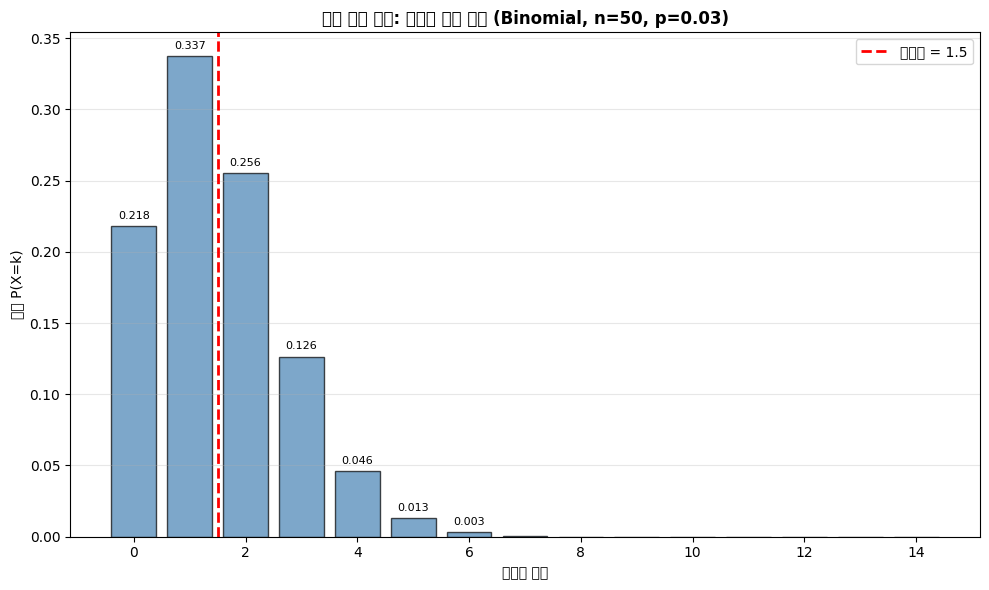

In [15]:
# (e) PMF 시각화
fig, ax = plt.subplots(figsize=(10, 6))

k = np.arange(0, 15)
pmf = binom_dist.pmf(k)

ax.bar(k, pmf, color='steelblue', edgecolor='black', alpha=0.7)
ax.axvline(binom_dist.mean(), color='red', linestyle='--', linewidth=2,
           label=f'기대값 = {binom_dist.mean():.1f}')

for i, prob in enumerate(pmf):
    if prob > 0.001:
        ax.text(i, prob + 0.005, f'{prob:.3f}', ha='center', fontsize=8)

ax.set_xlabel('불량품 개수')
ax.set_ylabel('확률 P(X=k)')
ax.set_title(f'제품 품질 검사: 불량품 개수 분포 (Binomial, n={n}, p={p})', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 시나리오 2-2: 고객 서비스 센터

고객 서비스 센터에 시간당 평균 8건의 문의가 들어옵니다.

**(a)** 정확히 10건의 문의가 올 확률

**(b)** 5건 이하의 문의가 올 확률

**(c)** 12건 이상의 문의가 올 확률 — "바쁜 시간"의 기준

**(d)** 상담원 1명이 시간당 최대 10건을 처리할 수 있다면, 1명으로 충분할 확률은?

**(e)** 95% 확률로 처리 가능하려면 시간당 최대 몇 건까지 대비해야 할까? (ppf 사용)

In [16]:
print("\n[문제 2-2] 고객 서비스 센터")
print("=" * 50)

# 파라미터
lam = 8  # 시간당 평균 문의 건수

print(f"시간당 평균 문의 건수: {lam}건")

# 포아송분포 생성: X ~ Poisson(λ=8)
poisson_dist = stats.poisson(mu=lam)

# (a) 정확히 10건 확률: P(X=10)
p_exactly_10 = poisson_dist.pmf(10)

print(f"\n(a) P(X = 10) = {p_exactly_10:.4f} = {p_exactly_10:.2%}")

# (b) 5건 이하 확률: P(X ≤ 5)
p_at_most_5 = poisson_dist.cdf(5)

print(f"(b) P(X ≤ 5) = {p_at_most_5:.4f} = {p_at_most_5:.2%}")

# (c) 12건 이상 확률: P(X ≥ 12) = 1 - P(X ≤ 11) = SF(11)
p_at_least_12 = poisson_dist.sf(11)

print(f"(c) P(X ≥ 12) = {p_at_least_12:.4f} = {p_at_least_12:.2%}")

# (d) 1명으로 충분할 확률: P(X ≤ 10)
p_manageable = poisson_dist.cdf(10)

print(f"\n(d) 상담원 1명으로 처리 가능 확률 = {p_manageable:.4f} = {p_manageable:.2%}")

# (e) 95% 커버리지를 위한 용량: PPF(0.95)
capacity_95 = poisson_dist.ppf(0.95)

print(f"(e) 95% 대비 용량: {capacity_95:.0f}건")
print(f"    → 시간당 최대 {capacity_95:.0f}건까지 대비하면 95% 확률로 처리 가능")


[문제 2-2] 고객 서비스 센터
시간당 평균 문의 건수: 8건

(a) P(X = 10) = 0.0993 = 9.93%
(b) P(X ≤ 5) = 0.1912 = 19.12%
(c) P(X ≥ 12) = 0.1119 = 11.19%

(d) 상담원 1명으로 처리 가능 확률 = 0.8159 = 81.59%
(e) 95% 대비 용량: 13건
    → 시간당 최대 13건까지 대비하면 95% 확률로 처리 가능


---

## 문제 3: 연속형 확률분포

### 시나리오 3-1: 전자제품 수명 분석

어떤 전자제품의 평균 수명은 500시간입니다. 제품 수명은 무기억성을 가지는 분포를 따릅니다.

**(a)** 300시간 이내에 고장날 확률

**(b)** 700시간 이상 작동할 확률

**(c)** 이미 400시간 작동한 제품이 추가로 200시간 더 작동할 확률 (무기억성을 활용하여 검증)

**(d)** 하위 10%가 고장나는 시점 (보증 기간 설정용 — ppf 사용)

In [17]:
print("\n[문제 3-1] 전자제품 수명 분석")
print("=" * 50)

# 파라미터
mean_life = 500  # 평균 수명 (시간)

print(f"평균 수명: {mean_life}시간")

# 지수분포 생성: X ~ Exponential(scale=500)
# scipy에서 scale = 1/λ = 평균 대기시간
exp_dist = stats.expon(scale=mean_life)

# (a) 300시간 이내 고장 확률: P(X ≤ 300)
p_fail_300 = exp_dist.cdf(300)

print(f"\n(a) P(X ≤ 300) = {p_fail_300:.4f} = {p_fail_300:.2%}")

# (b) 700시간 이상 작동 확률: P(X ≥ 700) = SF(700)
p_survive_700 = exp_dist.sf(700)

print(f"(b) P(X ≥ 700) = {p_survive_700:.4f} = {p_survive_700:.2%}")

# (c) 무기억성 활용 — 이미 400시간 작동 후 추가 200시간 작동 확률
# 지수분포의 무기억성: P(X > s+t | X > s) = P(X > t)
# P(추가 200시간 작동) = P(X > 200) = SF(200)
p_additional_200 = exp_dist.sf(200)

print(f"\n(c) 무기억성에 의해:")
print(f"    P(X > 400+200 | X > 400) = P(X > 200) = {p_additional_200:.4f} = {p_additional_200:.2%}")
print(f"    → 이미 400시간 사용했다는 사실은 앞으로의 수명에 영향을 주지 않음")

# 검증: 조건부 확률로 직접 계산
p_survive_600 = exp_dist.sf(600)
p_survive_400 = exp_dist.sf(400)
p_conditional = p_survive_600 / p_survive_400
print(f"    검증: P(X>600) / P(X>400) = {p_survive_600:.4f} / {p_survive_400:.4f} = {p_conditional:.4f}")

# (d) 하위 10% 고장 시점 (보증 기간): PPF(0.10)
warranty_time = exp_dist.ppf(0.10)

print(f"\n(d) 하위 10% 고장 시점: {warranty_time:.2f}시간")
print(f"    → 보증 기간을 약 {warranty_time:.0f}시간으로 설정하면, 10%의 제품만 보증 기간 내 고장")


[문제 3-1] 전자제품 수명 분석
평균 수명: 500시간

(a) P(X ≤ 300) = 0.4512 = 45.12%
(b) P(X ≥ 700) = 0.2466 = 24.66%

(c) 무기억성에 의해:
    P(X > 400+200 | X > 400) = P(X > 200) = 0.6703 = 67.03%
    → 이미 400시간 사용했다는 사실은 앞으로의 수명에 영향을 주지 않음
    검증: P(X>600) / P(X>400) = 0.3012 / 0.4493 = 0.6703

(d) 하위 10% 고장 시점: 52.68시간
    → 보증 기간을 약 53시간으로 설정하면, 10%의 제품만 보증 기간 내 고장


### 시나리오 3-2: 시험 점수 분석

어떤 시험의 점수는 평균 72점, 표준편차 12점인 정규분포를 따릅니다.

**(a)** 60점 이상 84점 이하를 받을 확률 (구간 확률: `cdf(84) - cdf(60)`)

**(b)** 상위 15%에 들려면 최소 몇 점이 필요한가? (`ppf(1 - 0.15)` 사용)

**(c)** 하위 5%는 F 학점이라면, F 학점 기준 점수는? (`ppf(0.05)` 사용)

**(d)** 90점을 받은 학생은 상위 몇 %인가? (`sf(90)` 사용)

In [18]:
print("\n[문제 3-2] 시험 점수 분석")
print("=" * 50)

# 파라미터
mu = 72     # 평균
sigma = 12  # 표준편차

print(f"평균: {mu}점")
print(f"표준편차: {sigma}점")

# 정규분포 생성: X ~ Normal(μ=72, σ=12)
norm_dist = stats.norm(loc=mu, scale=sigma)

# (a) 60점 이상 84점 이하 확률: P(60 ≤ X ≤ 84) = CDF(84) - CDF(60)
p_between = norm_dist.cdf(84) - norm_dist.cdf(60)

print(f"\n(a) P(60 ≤ X ≤ 84) = {p_between:.4f} = {p_between:.2%}")

# (b) 상위 15% 커트라인: PPF(1 - 0.15) = PPF(0.85)
top_15_cutoff = norm_dist.ppf(1 - 0.15)

print(f"(b) 상위 15% 커트라인: {top_15_cutoff:.2f}점")

# (c) 하위 5% (F 학점) 기준: PPF(0.05)
f_grade_cutoff = norm_dist.ppf(0.05)

print(f"(c) F 학점 기준 (하위 5%): {f_grade_cutoff:.2f}점")

# (d) 90점의 백분위: SF(90) × 100
top_percentile_90 = norm_dist.sf(90) * 100

print(f"(d) 90점 학생의 위치: 상위 {top_percentile_90:.2f}%")
print(f"    Z-score = (90-{mu})/{sigma} = {(90-mu)/sigma:.2f}")


[문제 3-2] 시험 점수 분석
평균: 72점
표준편차: 12점

(a) P(60 ≤ X ≤ 84) = 0.6827 = 68.27%
(b) 상위 15% 커트라인: 84.44점
(c) F 학점 기준 (하위 5%): 52.26점
(d) 90점 학생의 위치: 상위 6.68%
    Z-score = (90-72)/12 = 1.50


---

## 문제 4: Z-score와 상대적 위치 비교

### 시나리오: 다른 과목 성적 비교

영희의 두 과목 성적을 비교합니다.

| 과목 | 영희 점수 | 반 평균 | 표준편차 |
|------|-----------|---------|----------|
| 수학 | 78점      | 65점    | 10점     |
| 영어 | 85점      | 75점    | 15점     |

**절대 점수는 영어가 높지만, 상대적으로 어느 과목을 더 잘 본 걸까?**

**(a)** 각 과목의 Z-score를 계산하세요.

**(b)** 각 과목에서 영희가 상위 몇 %인지 계산하세요.

**(c)** 결론: Z-score와 상위 %를 비교하여 상대적으로 어느 과목을 더 잘 봤는지 판단하세요.

In [19]:
print("\n[문제 4] Z-score와 상대적 위치 비교")
print("=" * 50)

# 주어진 정보
math_score, math_mean, math_std = 78, 65, 10
eng_score, eng_mean, eng_std = 85, 75, 15

print("영희의 성적:")
print(f"  수학: {math_score}점 (반 평균 {math_mean}, 표준편차 {math_std})")
print(f"  영어: {eng_score}점 (반 평균 {eng_mean}, 표준편차 {eng_std})")

# TODO (a): Z-score 계산
z_math = None
z_eng = None

print(f"\n(a) Z-score 계산")
print(f"    수학: Z = {z_math}")
print(f"    영어: Z = {z_eng}")


# TODO (b): 상위 % 계산
top_pct_math = None
top_pct_eng = None

print(f"\n(b) 상위 % 계산")
print(f"    수학: 상위 {top_pct_math}%")
print(f"    영어: 상위 {top_pct_eng}%")


# TODO (c): 결론 작성
print("\n(c) 결론:")
# print("    ...")




[문제 4] Z-score와 상대적 위치 비교
영희의 성적:
  수학: 78점 (반 평균 65, 표준편차 10)
  영어: 85점 (반 평균 75, 표준편차 15)

(a) Z-score 계산
    수학: Z = None
    영어: Z = None

(b) 상위 % 계산
    수학: 상위 None%
    영어: 상위 None%

(c) 결론:


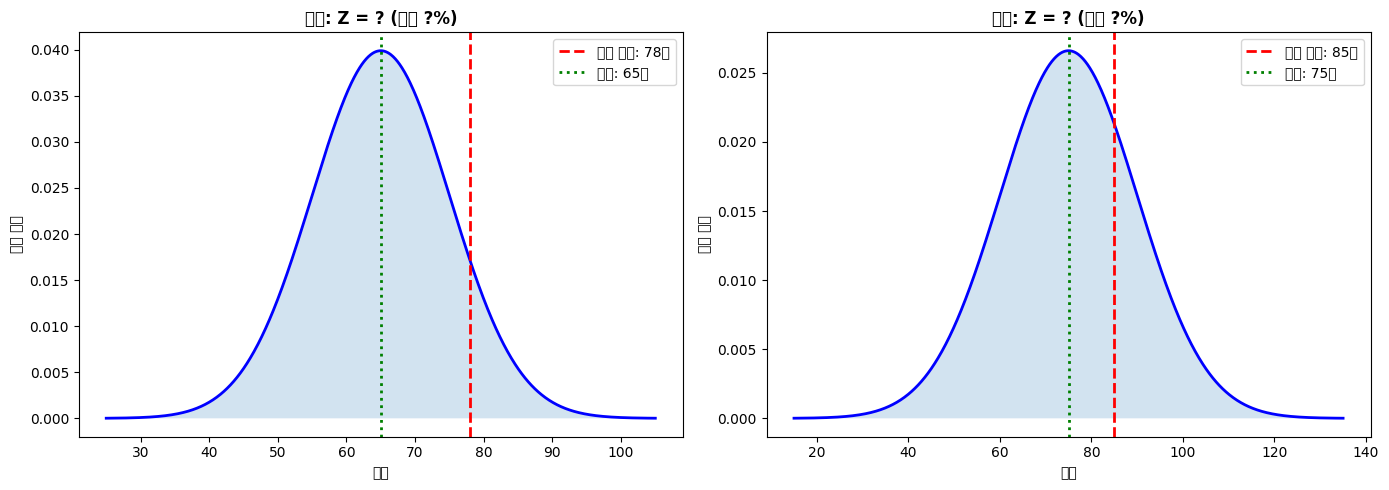

In [20]:
# 시각화: 두 과목 비교
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 왼쪽: 수학 분포
x_math = np.linspace(math_mean - 4*math_std, math_mean + 4*math_std, 1000)
y_math = stats.norm.pdf(x_math, math_mean, math_std)
axes[0].plot(x_math, y_math, 'b-', linewidth=2)
axes[0].fill_between(x_math, y_math, alpha=0.2)
axes[0].axvline(math_score, color='red', linestyle='--', linewidth=2, label=f'영희 점수: {math_score}점')
axes[0].axvline(math_mean, color='green', linestyle=':', linewidth=2, label=f'평균: {math_mean}점')
axes[0].set_xlabel('점수')
axes[0].set_ylabel('확률 밀도')
axes[0].set_title(f'수학: Z = {z_math if z_math else "?"} (상위 {top_pct_math if top_pct_math else "?"}%)', fontweight='bold')
axes[0].legend()

# 오른쪽: 영어 분포
x_eng = np.linspace(eng_mean - 4*eng_std, eng_mean + 4*eng_std, 1000)
y_eng = stats.norm.pdf(x_eng, eng_mean, eng_std)
axes[1].plot(x_eng, y_eng, 'b-', linewidth=2)
axes[1].fill_between(x_eng, y_eng, alpha=0.2)
axes[1].axvline(eng_score, color='red', linestyle='--', linewidth=2, label=f'영희 점수: {eng_score}점')
axes[1].axvline(eng_mean, color='green', linestyle=':', linewidth=2, label=f'평균: {eng_mean}점')
axes[1].set_xlabel('점수')
axes[1].set_ylabel('확률 밀도')
axes[1].set_title(f'영어: Z = {z_eng if z_eng else "?"} (상위 {top_pct_eng if top_pct_eng else "?"}%)', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()